# Programming Data Analysis Project
***

G00388113 John Loughnane. Programming for Data Analysis is a module of the Higher Diploma in Data Analytics in Computing.

## Introduction
***

I have searched a number of Data sites to look for a dataset for the project. Here are a number of sites I checked out :

- https://www.kaggle.com/datasets
- https://data.fivethirtyeight.com/
- https://data.gov.ie/dataset
- https://catalog.data.gov/dataset

I chose a dataset from the kaggle website site called Loan Eligible. Kaggle used the dataset for a project on predicting whether an applicant was successful in getting a home Loan. I used the data to try and find out relationships between the variables and whether the loan applicant was successful in getting a home loan or not which is the *Loan Status* variable.

I tried to follow the CRISP-DM model in my approach. The tasks involved :

- Collect the Initial data
- Describe the data
- Clean the data
- Explore the data
- Format the data
- Simulate/ Sythensis the data
- Verify the data





# Collect The Initial Data
***

### Import The Relevant Libraries

In [3]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from numpy import random
from scipy.stats import gamma
from numpy.random import Generator
from collections import defaultdict
%matplotlib inline
from scipy.stats import chi2_contingency
import math

### Read in the Loan Eligibility Dataset
***

The Loan Elgibility dataset is included in my github repository.

In [4]:
loan_eligibility = pd.read_csv("loan-train.csv")

# Describe the Loan Eligibility Data Set

We can check the Column fields as below.

In [5]:
print(loan_eligibility.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


The first field *Loan_ID* is the identification field used to give each row of data a unique ID. We can ignore this field so there are 12 variables or fields in the dataset. We check the first 10 rows of data using the head() function to see how the data is displayed and have a brief look at the dataset.

In [6]:
print(loan_eligibility.shape)

(614, 13)


Using the shape() method on the loan_eleigibility dataframe we can see there are 13 Columns and 614 rows of data

In [7]:
loan_eligibility.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


###### We can see the numerical attributes are :

 - ApplicantIncome - Loan applicants Income
 - CoapplicantIncome - The Co-applicants Income
 - LoanAmount - The Loan amount the applicant has applied for
 
###### The Categorical variables are :
 - Gender - Male or Female
 - Married - Yes for Married and No for single
 - Dependents - hoe many dependents the applicanmt has.
 - Education - Graduate or Non Graduate
 - Self_Employed - Self Employed is Yes and Employee is No
 - Loan_Amount_Term - The term of the loan. This is a Categorical attribute as there are a set number of terms.
 - Credit_History - Good Credit history is 1.0 and Poor Credit history is 0.0.
 - Property_Area - There are 3 Property areas, Urban, Semi Urban and rural.
 - Loan_Status - This is a categorical attribute and is the dependent variable. This variable depends on whether an Loan 
   applicant has a good credit history or is single or married etc.... 'Y' for successful and 'N' for not successful.


In [8]:
bank_loans = loan_eligibility

I want to make a backup of the loan_eligibility dataframe - bank_loans

# Explore the Loan Eligibility Dataset
***

In [9]:
print(loan_eligibility["Loan_Status"].value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64


If we analyze the variable *Loan_Status* it will show us the applicants who were successful in getting a Loan. You can see there were Y = 422 for applicants who got loans and N = 192 for applicants who did not get a loan. We need to investigate what variables determine whether or not an applicant is successful.

You can see from the pie chart that 68.7% of Loan applications are successful in that they qualify for a loan.

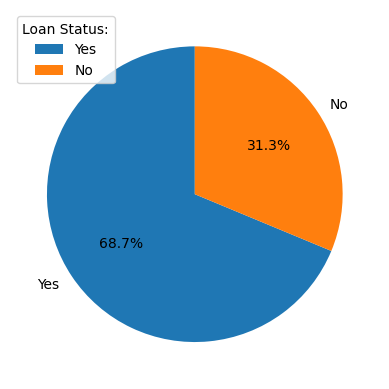

In [10]:
Loan_Yes_No = (loan_eligibility["Loan_Status"].value_counts())
mylabels = ["Yes", "No"]

plt.pie(Loan_Yes_No, labels = mylabels, startangle = 90, autopct='%1.1f%%')
plt.legend(title = "Loan Status:")
plt.show()

In [11]:
loan_eligibility["Loan_Status"]

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

# Clean the Loan Dataset
***

### Missing Values

Before we investigate further we need to clean the Loan Elgibility dataset which means we need to remove any duplicate data and any rows that are missing information. We use the dropna() method to remove any rows with missing values.

In [12]:
loan_eligibility.dropna(inplace=True)

In [13]:
print(loan_eligibility.shape)
print(loan_eligibility["Loan_Status"].value_counts())

(480, 13)
Y    332
N    148
Name: Loan_Status, dtype: int64


We can see that there were some missing values as the number of rows of data is now reduced to 332 rows so 134 rows had missing values.

### Check for duplicates

I need to remove any duplicate data.
We now check for duplicate data using the drop_duplicates() method and set inplace=True so it removes any duplicates in the current dataframe.

In [14]:
loan_eligibility.drop_duplicates(inplace=True)

In [15]:
print(loan_eligibility.shape)
print(loan_eligibility["Loan_Status"].value_counts())

(480, 13)
Y    332
N    148
Name: Loan_Status, dtype: int64


There is no duplicate data so there are no changes to the loan_eligibility dataframe. 

In [16]:
df = loan_eligibility

We now check the dataset and just use the *Loan Status* column and create a pie chart with the cleaned up data. Now we can see that 69.7% of Loan applicants were successful in their Loan application. The applicants whose Loan application was successful increased by 0.5% after cleaning up the data.

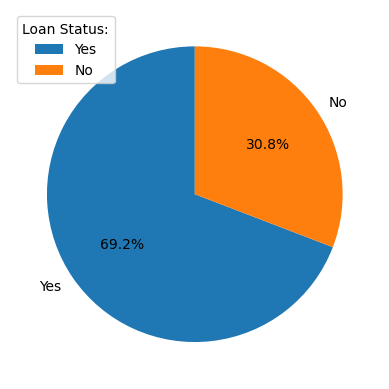

Y    332
N    148
Name: Loan_Status, dtype: int64


In [17]:
df_Loan = (loan_eligibility["Loan_Status"].value_counts())
mylabels = ["Yes", "No"]
values = [332, 148]
#mylabels = [values[0], [values[]]
plt.pie(df_Loan, labels = mylabels, startangle = 90, autopct='%1.1f%%')
# absolute_value
# '%1.1f%%'
plt.legend(title = "Loan Status:")
plt.show()
print(df_Loan)

In [18]:
df_loan = (loan_eligibility["Loan_Status"].value_counts())

### Univariate Analysis

We now carry out some Univariate analysis on the data to find out the relationships. The dependent variable is the Loan_Status which is either Yes the Loan application was successful or No the application was not successful. The rest of the variables are independent variables as other variables don't influence them. 

In [19]:
print(loan_eligibility.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       480.000000         480.000000  480.000000        480.000000   
mean       5364.231250        1581.093583  144.735417        342.050000   
std        5668.251251        2617.692267   80.508164         65.212401   
min         150.000000           0.000000    9.000000         36.000000   
25%        2898.750000           0.000000  100.000000        360.000000   
50%        3859.000000        1084.500000  128.000000        360.000000   
75%        5852.500000        2253.250000  170.000000        360.000000   
max       81000.000000       33837.000000  600.000000        480.000000   

       Credit_History  
count      480.000000  
mean         0.854167  
std          0.353307  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


Uisng the describe() method we can see the statistics of the dataset. This will be useful later on when we need to sythensise or simulate the data.

In [20]:
Loan_Status_Groups = loan_eligibility.groupby('Loan_Status')

Next I use the groupby() method so I can group the data into Loan_Status = 'Y' and Loan_Status = 'N'. 

In [21]:
Loan_No = Loan_Status_Groups.get_group('N')
print(Loan_No.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       148.000000         148.000000  148.000000        148.000000   
mean       5730.189189        1773.081081  153.378378        342.810811   
std        7560.806737        3663.685217   90.339150         72.787021   
min         150.000000           0.000000    9.000000         36.000000   
25%        2863.500000           0.000000  100.000000        360.000000   
50%        3871.000000           0.000000  128.000000        360.000000   
75%        6046.250000        2356.250000  178.500000        360.000000   
max       81000.000000       33837.000000  570.000000        480.000000   

       Credit_History  
count      148.000000  
mean         0.574324  
std          0.496124  
min          0.000000  
25%          0.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [22]:
Loan_Yes = Loan_Status_Groups.get_group('Y')
print(Loan_Yes.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       332.000000         332.000000  332.000000        332.000000   
mean       5201.093373        1495.508795  140.882530        341.710843   
std        4584.815491        1982.742932   75.544237         61.651497   
min         645.000000           0.000000   17.000000         60.000000   
25%        2912.750000           0.000000  100.000000        360.000000   
50%        3858.500000        1211.500000  128.000000        360.000000   
75%        5818.250000        2250.000000  162.000000        360.000000   
max       39999.000000       20000.000000  600.000000        480.000000   

       Credit_History  
count      332.000000  
mean         0.978916  
std          0.143882  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


This data is only good for the numerical data which just includes ApplicantIncome, CoapplicantIncome and Loan Amount and loan amount term. The Credit_History is not useful as this is really Categorical data as there are only two values - 1.0 = Good Credit rating and 0.0 = Poor Credit Rating.

We can see that for applicants who got a loan the ApplicantIncome mean value is 5201, CoapplicantIncome 1495 and LoanAmount was 140.8 

## Histograms 

We now review the numerical data using Histograms to see what we can find

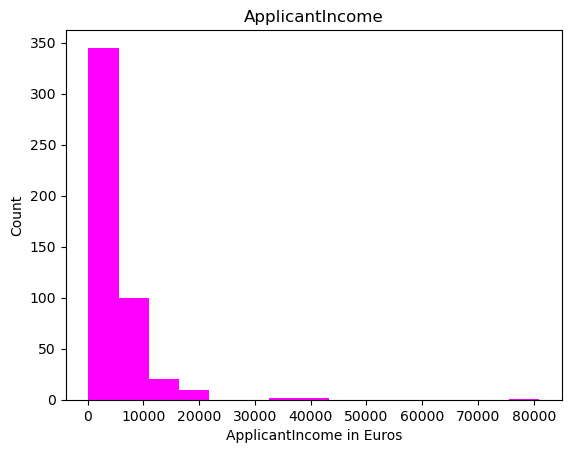

In [23]:
plt.hist(loan_eligibility["ApplicantIncome"], bins = 15, color = "magenta")
plt.title("ApplicantIncome")
plt.xlabel("ApplicantIncome in Euros")
plt.ylabel("Count")
plt.show()

This histogran shows us that nearly 350 applicants had an Income in the range 0 to 5000. It doesn't specify whether or not this is monthly Income or Yearly Income. I assume it is monthly Income. 

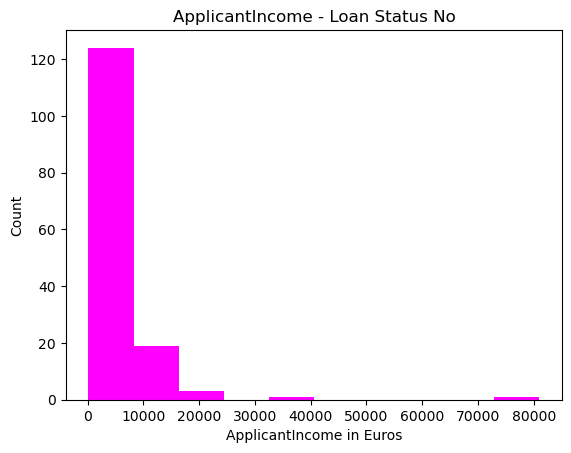

In [24]:
Status_No_ApplicantIncome = Loan_No["ApplicantIncome"]
  
plt.hist(Status_No_ApplicantIncome, bins = 10, color = "magenta")
plt.title("ApplicantIncome - Loan Status No")
plt.xlabel("ApplicantIncome in Euros")
plt.ylabel("Count")
plt.show()

We check the Applicant Income when Loan Status = No. We see there are outliers at range 30000 to 40000 and 70000 to 80000. Majority of teh applicants are between teh 0 and 5000 range.

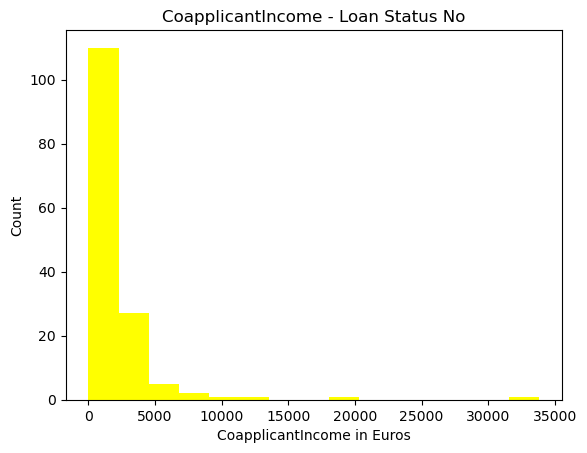

In [25]:
Status_No_CoapplicantIncome = Loan_No["CoapplicantIncome"]
  
plt.hist(Status_No_CoapplicantIncome, bins = 15, color = "yellow")
plt.title("CoapplicantIncome - Loan Status No")
plt.xlabel("CoapplicantIncome in Euros")
plt.ylabel("Count")
plt.show()

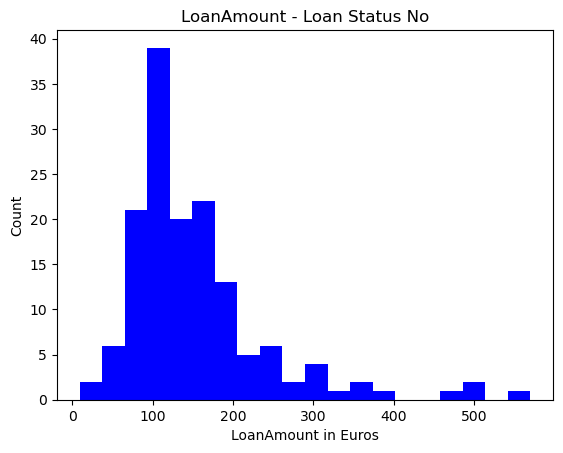

In [26]:
Status_No_LoanAmount = Loan_No["LoanAmount"]
  
plt.hist(Status_No_LoanAmount, bins = 20, color = "blue")
plt.title("LoanAmount - Loan Status No")
plt.xlabel("LoanAmount in Euros")
plt.ylabel("Count")
plt.show()

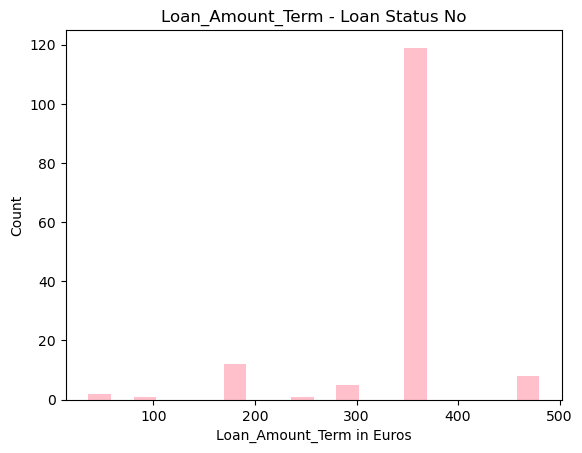

In [27]:
Status_No_Loan_Amount_Term = Loan_No["Loan_Amount_Term"]
  
plt.hist(Status_No_Loan_Amount_Term, bins = 20, color = "pink")
plt.title("Loan_Amount_Term - Loan Status No")
plt.xlabel("Loan_Amount_Term in Euros")
plt.ylabel("Count")
plt.show()

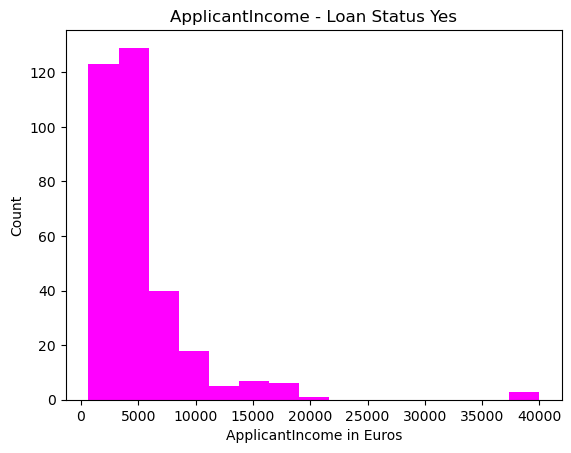

In [28]:
Status_Yes_ApplicantIncome = Loan_Yes["ApplicantIncome"]
  
plt.hist(Status_Yes_ApplicantIncome, bins = 15, color = "magenta")
plt.title("ApplicantIncome - Loan Status Yes")
plt.xlabel("ApplicantIncome in Euros")
plt.ylabel("Count")
plt.show()

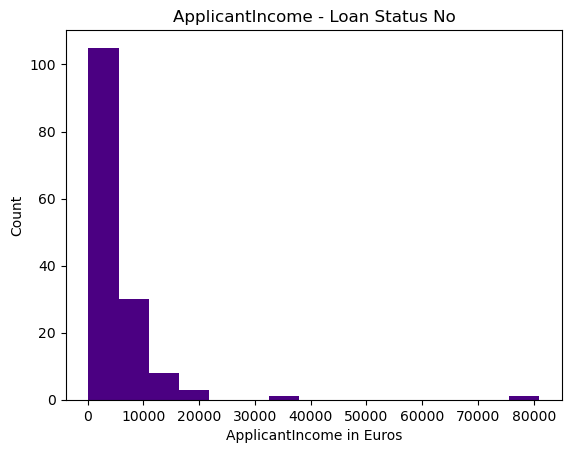

In [29]:
Status_Yes_ApplicantIncome = Loan_No["ApplicantIncome"]
  
plt.hist(Status_Yes_ApplicantIncome, bins = 15, color = "indigo")
plt.title("ApplicantIncome - Loan Status No")
plt.xlabel("ApplicantIncome in Euros")
plt.ylabel("Count")
plt.show()

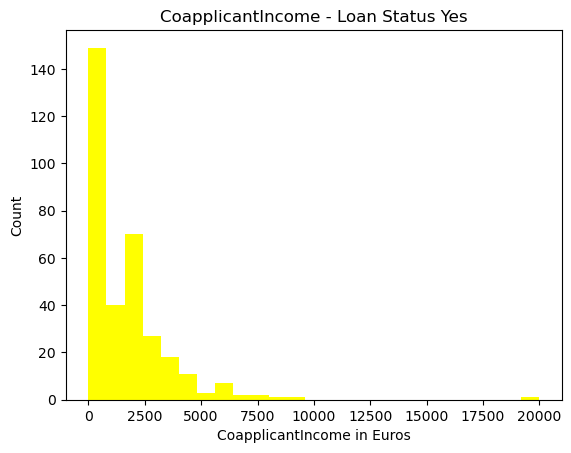

In [30]:
Status_Yes_CoapplicantIncome = Loan_Yes["CoapplicantIncome"]
  
plt.hist(Status_Yes_CoapplicantIncome, bins = 25, color = "yellow")
plt.title("CoapplicantIncome - Loan Status Yes")
plt.xlabel("CoapplicantIncome in Euros")
plt.ylabel("Count")
plt.show()

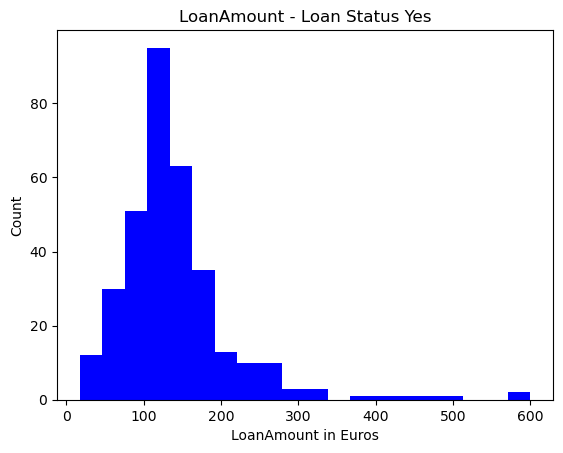

In [31]:
Status_Yes_LoanAmount = Loan_Yes["LoanAmount"]
  
plt.hist(Status_Yes_LoanAmount, bins = 20, color = "blue")
plt.title("LoanAmount - Loan Status Yes")
plt.xlabel("LoanAmount in Euros")
plt.ylabel("Count")
plt.show()

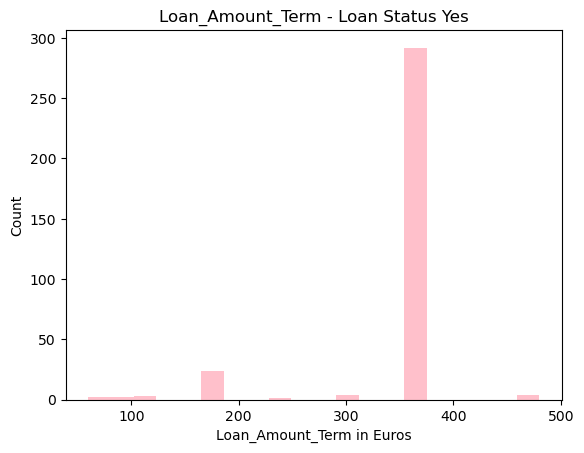

In [32]:
Status_Yes_Loan_Amount_Term = Loan_Yes["Loan_Amount_Term"]
  
plt.hist(Status_Yes_Loan_Amount_Term, bins = 20, color = "pink")
plt.title("Loan_Amount_Term - Loan Status Yes")
plt.xlabel("Loan_Amount_Term in Euros")
plt.ylabel("Count")
plt.show()

In [33]:
# Loan Amount Term count breakdown for Applicants who weren't successful
Loan_No["Loan_Amount_Term"].value_counts()

360.0    119
180.0     12
480.0      8
300.0      5
36.0       2
84.0       1
240.0      1
Name: Loan_Amount_Term, dtype: int64

In [34]:
# Loan Amount Term count breakdown for Applicants who weren't successful
Loan_Yes["Loan_Amount_Term"].value_counts()

360.0    292
180.0     24
300.0      4
480.0      4
120.0      3
60.0       2
84.0       2
240.0      1
Name: Loan_Amount_Term, dtype: int64

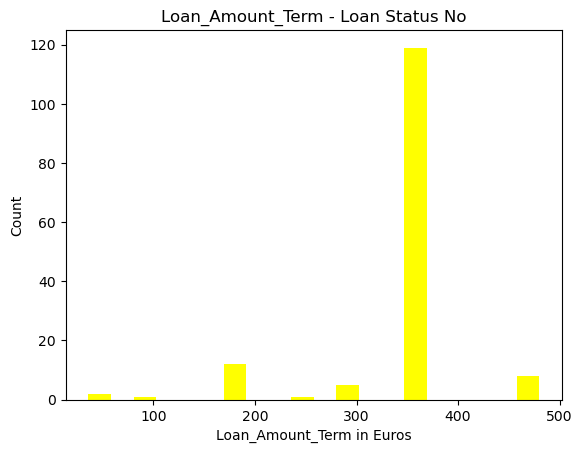

In [35]:
Status_Yes_Loan_Amount_Term = Loan_No["Loan_Amount_Term"]
  
plt.hist(Status_Yes_Loan_Amount_Term, bins = 20, color = "yellow")
plt.title("Loan_Amount_Term - Loan Status No")
plt.xlabel("Loan_Amount_Term in Euros")
plt.ylabel("Count")
plt.show()

## Univariate Analysis on Categorical Data

To carry out the Univariate analysis on Categorical Data a Bar Chart is used. First we look at Credit History.

### Credit history 

Text(0, 0.5, 'Count')

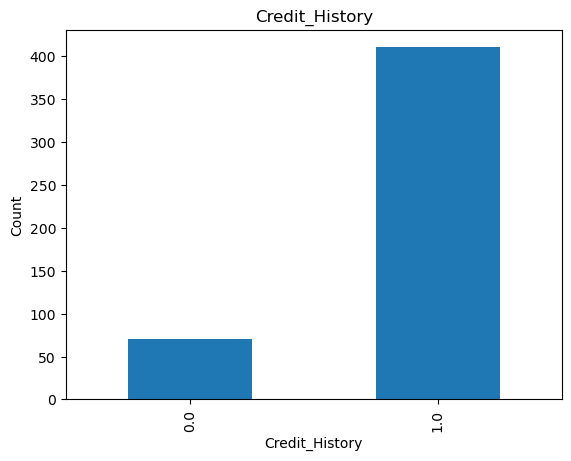

In [36]:
loan_eligibility.groupby('Credit_History').size().plot(kind='bar')
plt.title("Credit_History")
plt.xlabel("Credit_History")
plt.ylabel("Count")

This shows us that about 400 Loan Appplicants have good Credit History while 80 Loan Applicants have poor Credit History.

Text(0, 0.5, 'Count')

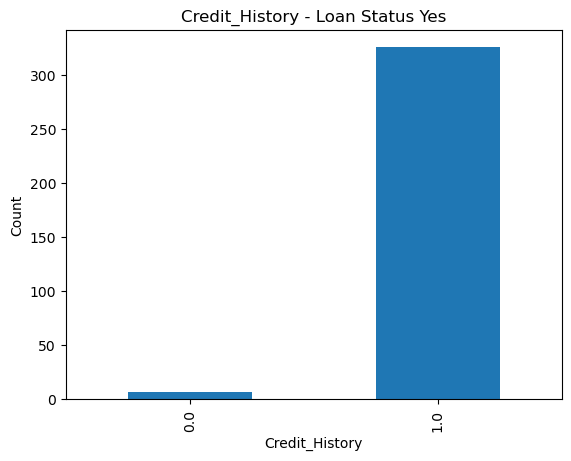

In [37]:
loan_eligibility.groupby(Loan_Yes["Credit_History"]).size().plot(kind='bar')
plt.title("Credit_History - Loan Status Yes")
plt.xlabel("Credit_History")
plt.ylabel("Count")
#Status_Yes_Credit_History = Loan_Yes["Credit_History"]

The above Bar plot is for Applicants whose loan was successful. There are around 325 applicants which have Good Credit history and got a Loan and interestingly a number of applicants received a loan woth Poor Credit History.

Text(0, 0.5, 'Count')

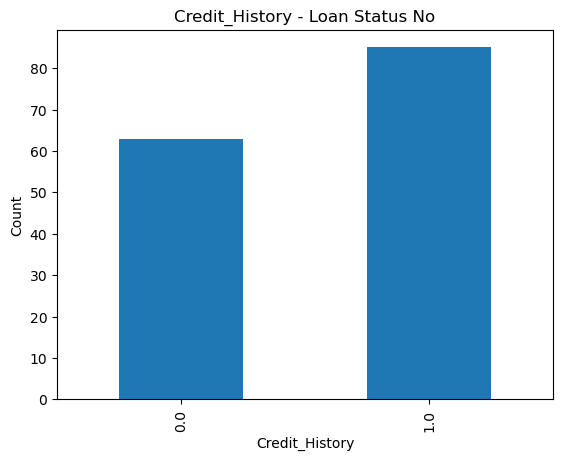

In [38]:
loan_eligibility.groupby(Loan_No["Credit_History"]).size().plot(kind='bar')
plt.title("Credit_History - Loan Status No")
plt.xlabel("Credit_History")
plt.ylabel("Count")

The above plot shows the applicants that weren't successful and we can see that over 80 had good credit history but didn't get a loan so there must be another reason why they didn't. It also shows that there is at least another variable that determines whether an applicant is successful in getting a loan or not successful. So, from this data Credit History is a good variable to determine whether or not an applicant gets a loan.

### Gender

Text(0, 0.5, 'Count')

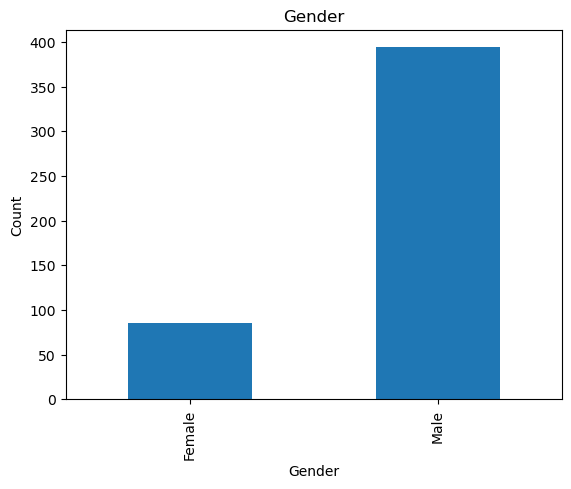

In [39]:
loan_eligibility.groupby('Gender').size().plot(kind='bar')
plt.title("Gender")
plt.xlabel("Gender")
plt.ylabel("Count")

The Gender Bar chart shows that around 80% of applicants are Male, this is from the data we have. So, 80% of the applicants who applied for a home loan were Male. You would have though that it would be nearer to 50/50.

Text(0, 0.5, 'Count')

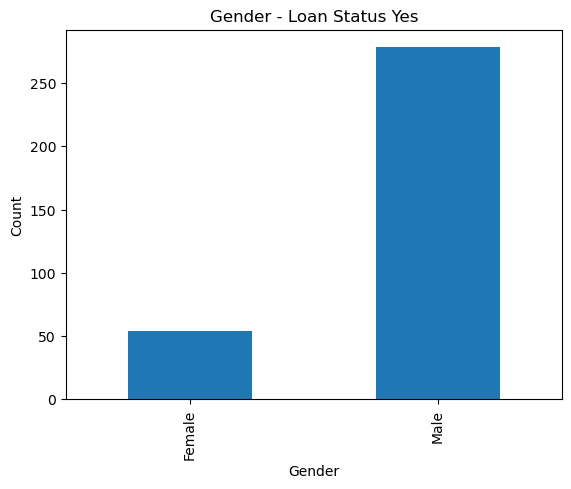

In [40]:
loan_eligibility.groupby(Loan_Yes["Gender"]).size().plot(kind='bar')
plt.title("Gender - Loan Status Yes")
plt.xlabel("Gender")
plt.ylabel("Count")

The Bar plot shows that over 250 Males get a loan whereas 50 Females get a loan. There are alot more Male candidates so the bar chart doesn't tell us much. Its hard to determine whether or not you have a better chance of getting a Home loan depending on your Gender.

Text(0, 0.5, 'Count')

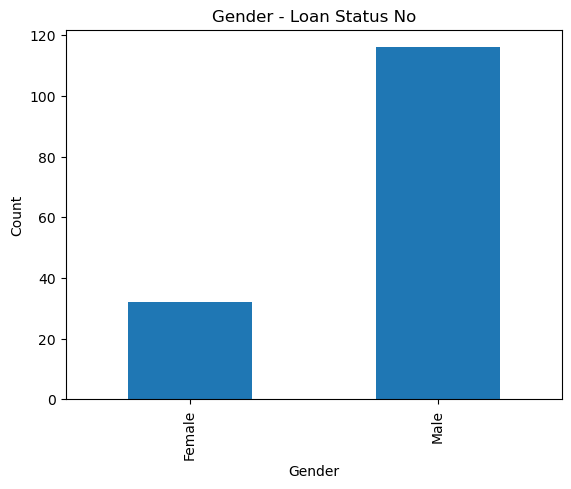

In [41]:
loan_eligibility.groupby(Loan_No["Gender"]).size().plot(kind='bar')
plt.title("Gender - Loan Status No")
plt.xlabel("Gender")
plt.ylabel("Count")

Again its not clear from the Bar plot if the loan Status is determined by Gender.

### Education

Text(0, 0.5, 'Count')

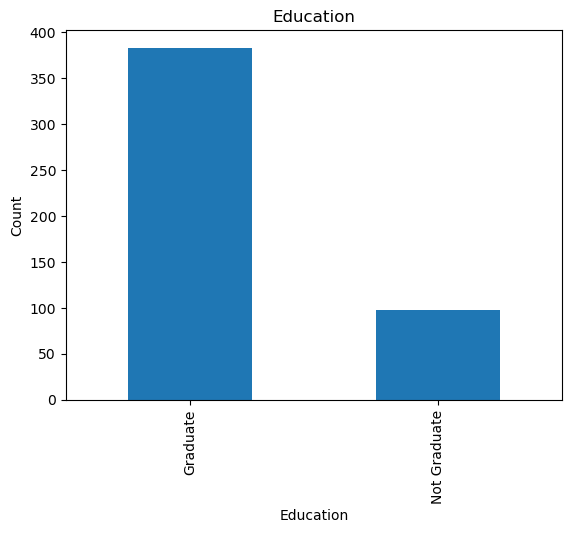

In [42]:
loan_eligibility.groupby('Education').size().plot(kind='bar')
plt.title("Education")
plt.xlabel("Education")
plt.ylabel("Count")

The Bar plot shows that nearly 80% of applicants are Graduates.

Text(0, 0.5, 'Count')

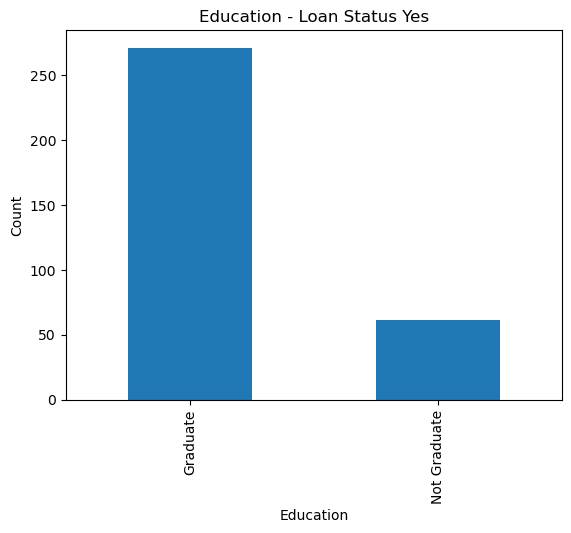

In [43]:
loan_eligibility.groupby(Loan_Yes["Education"]).size().plot(kind='bar')
plt.title("Education - Loan Status Yes")
plt.xlabel("Education")
plt.ylabel("Count")

From the bar chart of applicants who were succesful in getting a Loan its not clear whether being a Graduate is an advantage when you seek a loan.

Text(0, 0.5, 'Count')

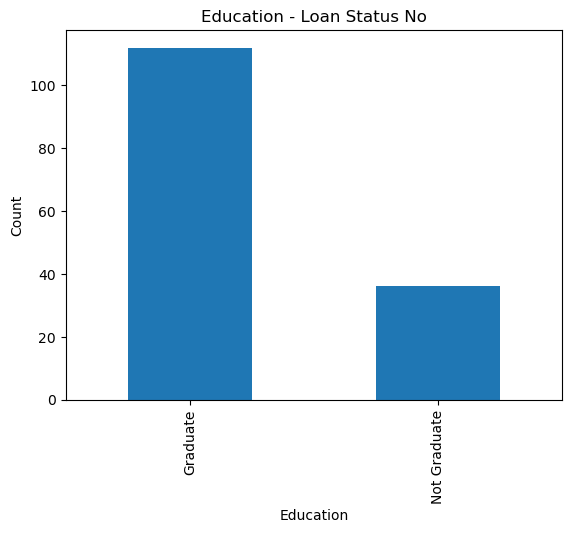

In [44]:
loan_eligibility.groupby(Loan_No["Education"]).size().plot(kind='bar')
plt.title("Education - Loan Status No")
plt.xlabel("Education")
plt.ylabel("Count")

For applicants whom didn't get a home loan there are far more Graduates than Not Graduates so it's impossible to come to a conclusion with just the bar plots alone.

### Dependents

Text(0, 0.5, 'Count')

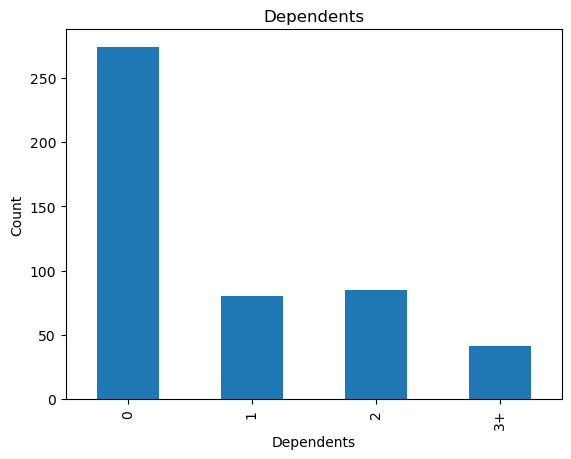

In [45]:
loan_eligibility.groupby('Dependents').size().plot(kind='bar')
plt.title("Dependents")
plt.xlabel("Dependents")
plt.ylabel("Count")

More applicants have zero dependents which is more than the 1, 2 & 3+ dependents added together. 

Text(0, 0.5, 'Count')

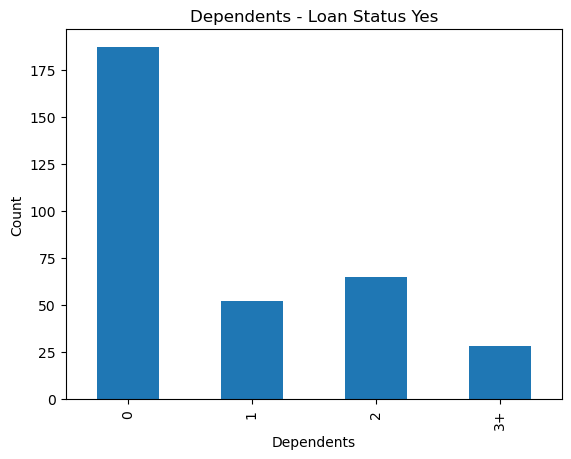

In [46]:
loan_eligibility.groupby(Loan_Yes["Dependents"]).size().plot(kind='bar')
plt.title("Dependents - Loan Status Yes")
plt.xlabel("Dependents")
plt.ylabel("Count")

From the bar plot of Applicants whose Loan Status = Yes, its hard  to guage if having zero dependents is an advantage when seeking a loan. Interestingly it appears that having 2 dependents may give you a better chance of getting a loan.

Text(0, 0.5, 'Count')

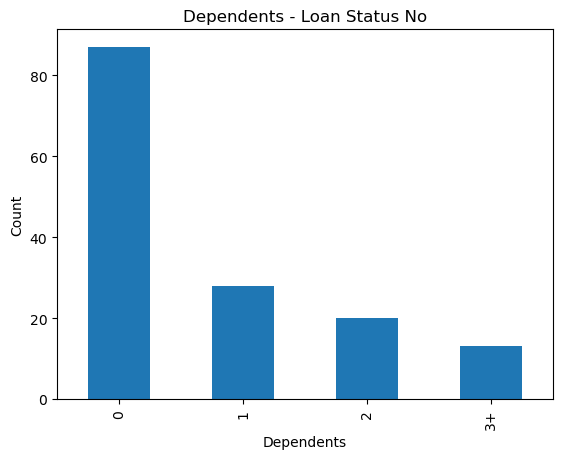

In [47]:
loan_eligibility.groupby(Loan_No["Dependents"]).size().plot(kind='bar')
plt.title("Dependents - Loan Status No")
plt.xlabel("Dependents")
plt.ylabel("Count")

### Self Employed

Text(0, 0.5, 'Count')

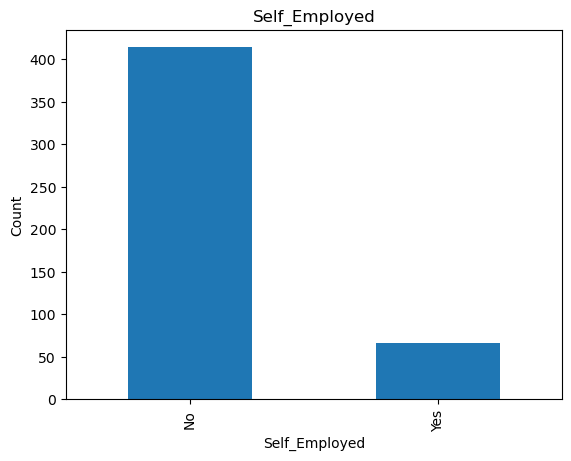

In [48]:
loan_eligibility.groupby('Self_Employed').size().plot(kind='bar')
plt.title("Self_Employed")
plt.xlabel("Self_Employed")
plt.ylabel("Count")

The Self Employed Bar plot shows us that the majority of applicants are employees while around 18% are Self Employed

Text(0, 0.5, 'Count')

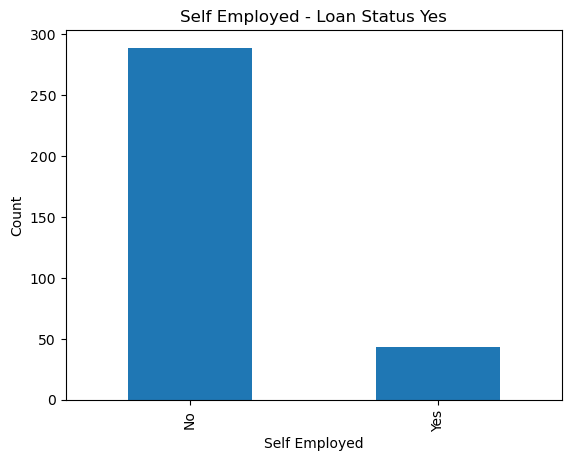

In [49]:
loan_eligibility.groupby(Loan_Yes["Self_Employed"]).size().plot(kind='bar')
plt.title("Self Employed - Loan Status Yes")
plt.xlabel("Self Employed")
plt.ylabel("Count")

The Bar plot shows applicants who were successful in getting a home loan. Its hard to tell from the Bar plot whether being Self Employed is an advantage or not. We will need to dig deeper to find out if thats the case.

Text(0, 0.5, 'Count')

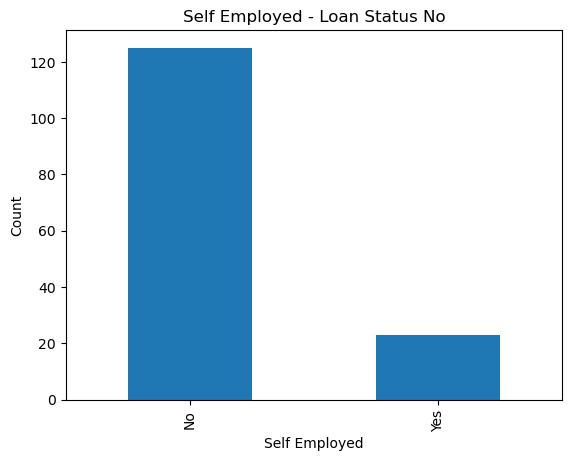

In [50]:
loan_eligibility.groupby(Loan_No["Self_Employed"]).size().plot(kind='bar')
plt.title("Self Employed - Loan Status No")
plt.xlabel("Self Employed")
plt.ylabel("Count")

### Married

Text(0, 0.5, 'Count')

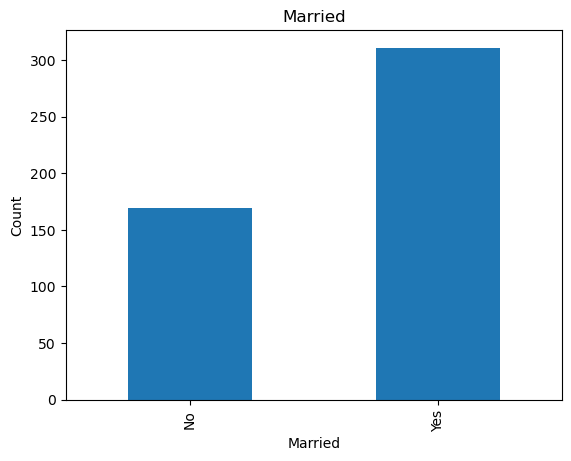

In [51]:
loan_eligibility.groupby('Married').size().plot(kind='bar')
plt.title("Married")
plt.xlabel("Married")
plt.ylabel("Count")

The plot shows that around 66% of Loan applicants are Married.

Text(0, 0.5, 'Count')

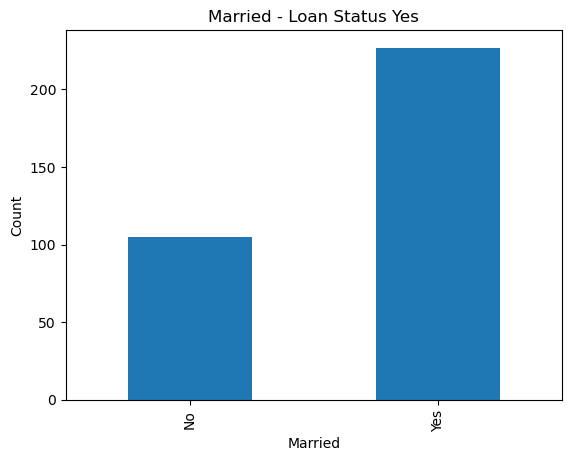

In [52]:
loan_eligibility.groupby(Loan_Yes["Married"]).size().plot(kind='bar')
plt.title("Married - Loan Status Yes")
plt.xlabel("Married")
plt.ylabel("Count")

You can see from the bar plot of Applicants whose Loan Status = Yes for succesful in getting a loan it appears that 80% of the applicants whom were Married got a home loan. This may be a good variable to determine if an applicant got a loan or not. 

Text(0, 0.5, 'Count')

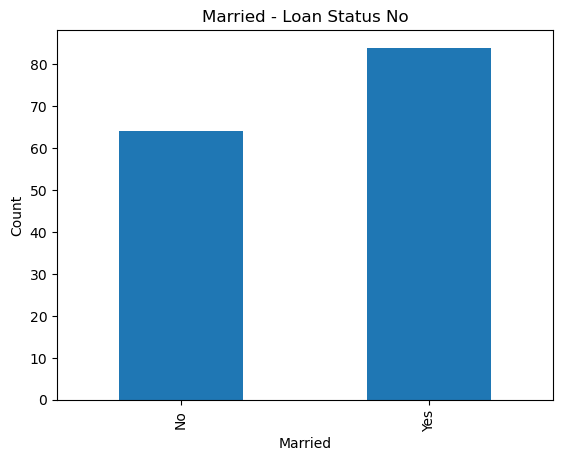

In [53]:
loan_eligibility.groupby(Loan_No["Married"]).size().plot(kind='bar')
plt.title("Married - Loan Status No")
plt.xlabel("Married")
plt.ylabel("Count")

### Credit History

Text(0, 0.5, 'Count')

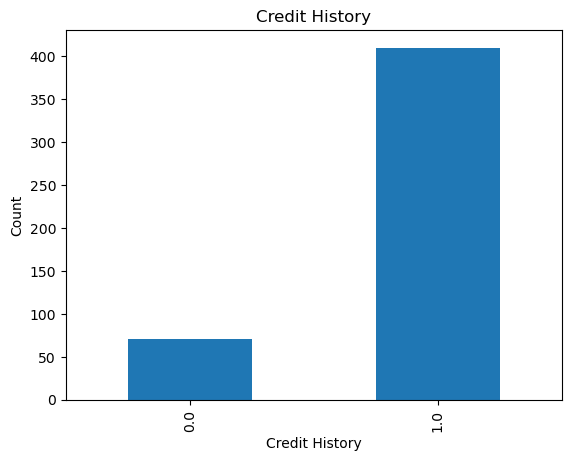

In [54]:
loan_eligibility.groupby('Credit_History').size().plot(kind='bar')
plt.title("Credit History")
plt.xlabel("Credit History")
plt.ylabel("Count")

Out of 480 Loan Applicants just over 400 have Good Credit History while around 70 have poor Credit History.

Text(0, 0.5, 'Count')

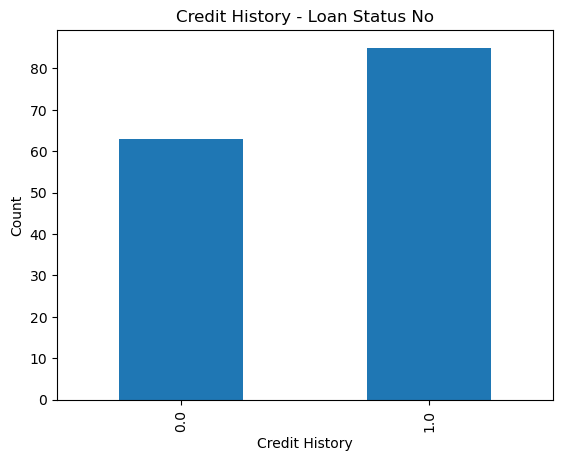

In [55]:
loan_eligibility.groupby(Loan_No["Credit_History"]).size().plot(kind='bar')
plt.title("Credit History - Loan Status No")
plt.xlabel("Credit History")
plt.ylabel("Count")

Here a bar plot of applicants that failed to get a Home Loan, Loan Status = N. 60 applicants that had a poor Credit history didn't get a loan while just over 80 who had a Good Credit rating failed to get a loan.

Text(0, 0.5, 'Count')

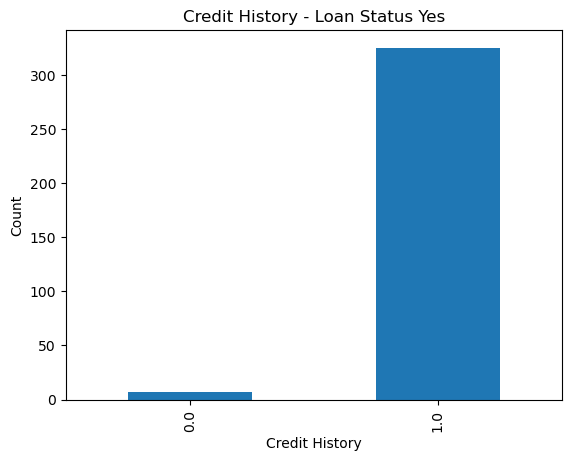

In [56]:
loan_eligibility.groupby(Loan_Yes["Credit_History"]).size().plot(kind='bar')
plt.title("Credit History - Loan Status Yes")
plt.xlabel("Credit History")
plt.ylabel("Count")

You can see from the bar plot of Applicants whose Loan Status = Yes that over 300 got a home loan. Interestingly there were a few applicants who had a poor credit rating and got a loan. So, if your Credit rating is poor there a good chance you won't be successful.

In [57]:
loan_eligibility

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Bivariate Analysis

From the Univariate analysis apart from Credit_History and the Married variables we can't tell if there are any other variables that can determine Loan Status.

## Correlation Coefficient

#### Encode the Categorical varibles

We need to encode the Categorical variables that don't have numerical values to check for correlation coefficient. Using the correlation coefficient for categorical is not usually what is used to find relations between variables. 

In [58]:
loan_eligibility

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [59]:
#Loan Status Encoding
loan_eligibility['Loan_Status'] = loan_eligibility.Loan_Status.map({'Y': 1, 'N': 0})

There are a number of Categorical variables - Gender, Married, Dependents, Self Employed, Education,Property Area and 

In [60]:
#Gender Encoding
loan_eligibility= loan_eligibility.replace({"Gender":{"Male":1, "Female":0 }})

#Married Encoding
loan_eligibility =loan_eligibility.replace({"Married" :{"Yes":1, "No":0}})

#Replace the 3+ in dependents ande make the column numeric
loan_eligibility['Dependents'] = loan_eligibility['Dependents'].replace('3+', '3')
loan_eligibility['Dependents']=pd.to_numeric(loan_eligibility['Dependents'], errors='coerce')

#Count the quantity of values on the column
loan_eligibility['Self_Employed'].value_counts()
loan_eligibility= loan_eligibility.replace({"Self_Employed":{"Yes":1, "No":0 }})

#Education Encoding
loan_eligibility['Education'].value_counts()
loan_eligibility= loan_eligibility.replace({"Education":{"Graduate":1, "Not Graduate":0 }})

#Drop the Loan ID column
#loan_eligibility = loan_eligibility.drop(columns=['Loan_ID'])

#Property Area Encoding
loan_eligibility['Property_Area'].value_counts()
loan_eligibility['Property_Area'] = loan_eligibility['Property_Area'].map({'Rural': 0, 'Urban': 1, 'Semiurban': 2})


#### Summary
* Gender - Male = 1, Female = 0
* Self Employed - Yes = 1, No = 0
* Education - Graduate = 1, Not Graduate = 0
* Property Area - Rural = 0, Urban = 1 and Semiurban = 2

In [61]:
loan_eligibility.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1
6,LP001013,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,1,1
7,LP001014,1,1,3,1,0,3036,2504.0,158.0,360.0,0.0,2,0
8,LP001018,1,1,2,1,0,4006,1526.0,168.0,360.0,1.0,1,1
9,LP001020,1,1,1,1,0,12841,10968.0,349.0,360.0,1.0,2,0
10,LP001024,1,1,2,1,0,3200,700.0,70.0,360.0,1.0,1,1


I have generated a heatmap of the correlations.

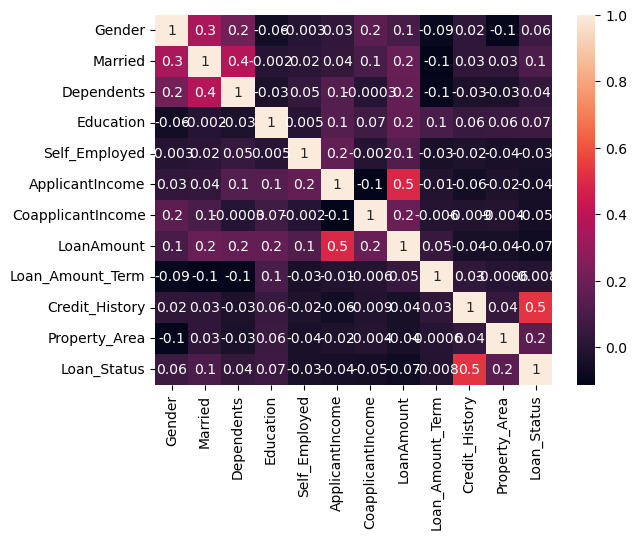

In [62]:
sns.heatmap(loan_eligibility.corr(),annot=True,fmt='.1g')
plt.show()

You can see from the heatmap it shows the correlation values. We're intesested in the Loan_Status and the relationship it has with the the other variables. You can see that Credit History seems to have the strongest relationship with Loan_Status. This coincides with the bar plot earlier. It has a correlation value of 0.5. Interestingly the Property Area has a correlation value of 0.2. What I am surprised with is that the ApplicantIncome doesn't have a relationship with Loan_Status.
The four main variables that determine *Loan Status* are Gender 0.06, Married 0.1, Education 0.07, Loan Amount Term .008, Credit History 0.5 and Property Area 0.2

In [63]:
loan_eligibility

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,1


In [64]:
loan_eligibility["Gender"].value_counts()

1    394
0     86
Name: Gender, dtype: int64

In [65]:
loan_eligibility["Education"].value_counts()

1    383
0     97
Name: Education, dtype: int64

In [66]:
loan_eligibility["Self_Employed"].value_counts()

0    414
1     66
Name: Self_Employed, dtype: int64

In [67]:
loan_eligibility["Education"].value_counts()

1    383
0     97
Name: Education, dtype: int64

In [68]:
loan_eligibility["Loan_Amount_Term"].value_counts()

360.0    411
180.0     36
480.0     12
300.0      9
120.0      3
84.0       3
60.0       2
240.0      2
36.0       2
Name: Loan_Amount_Term, dtype: int64

In [69]:
loan_eligibility["Married"].value_counts()

1    311
0    169
Name: Married, dtype: int64

In [70]:
(loan_eligibility.Married[loan_eligibility.Loan_Status==0].value_counts())

1    84
0    64
Name: Married, dtype: int64

In [71]:
(loan_eligibility.Married[loan_eligibility.Loan_Status==1].value_counts())

1    227
0    105
Name: Married, dtype: int64

In [72]:
a = loan_eligibility.Married[loan_eligibility.Loan_Status==0]
b = loan_eligibility.Married[loan_eligibility.Loan_Status==1]

In [73]:
print(a)

1      1
7      1
9      1
13     0
17     0
      ..
585    1
589    1
591    1
596    1
613    0
Name: Married, Length: 148, dtype: int64


In [74]:
print(b)

2      1
3      1
4      0
5      1
6      1
      ..
608    1
609    0
610    1
611    1
612    1
Name: Married, Length: 332, dtype: int64


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

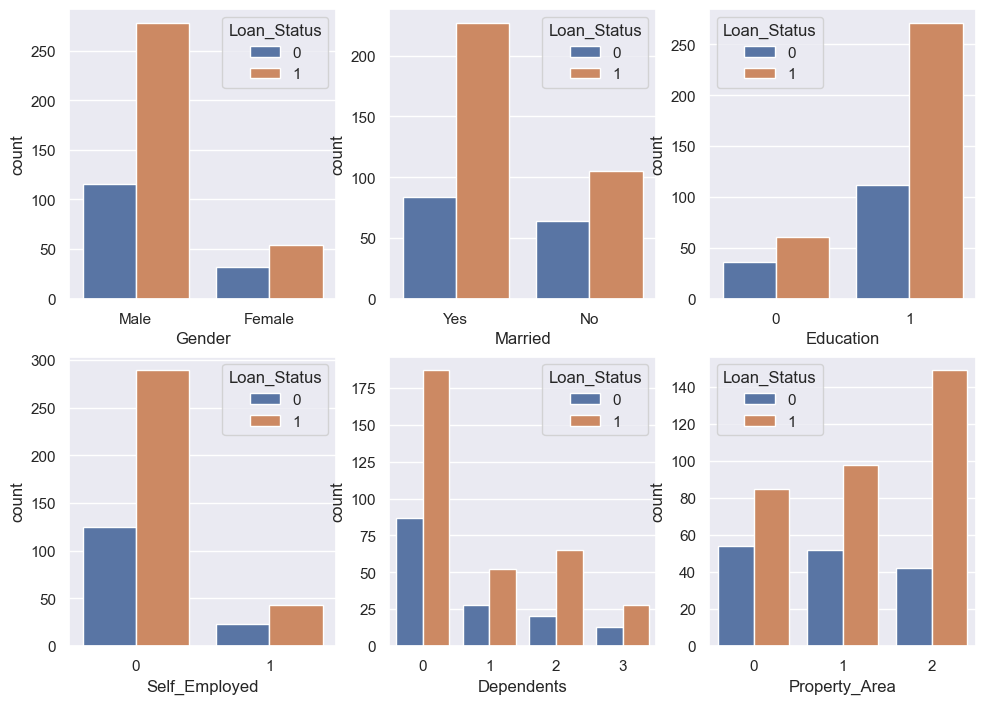

In [75]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.subplot(231)
sns.countplot(x="Gender", hue='Loan_Status', data=df)
plt.subplot(232)
sns.countplot(x="Married", hue='Loan_Status', data=df)
plt.subplot(233)
sns.countplot(x="Education", hue='Loan_Status', data=loan_eligibility)
plt.subplot(234)
sns.countplot(x="Self_Employed", hue='Loan_Status', data=loan_eligibility)
plt.subplot(235)
sns.countplot(x="Dependents", hue='Loan_Status', data=loan_eligibility)
plt.subplot(236)
sns.countplot(x="Property_Area", hue='Loan_Status', data=loan_eligibility)

Above shows plots of the Categorical data against Loan_status = Yes and Loan_Status = No.

In [76]:
loan_eligibility

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,1


## Chisquare Tests 

We will use an alpha value of 0.05 and check each categorical variable against Loan_Status. If the chisquare test is less then 0.05 then there is a significant relationship with teh variable Loan Status.

### Gender Chisquare Test

In [77]:
crosstb = pd.crosstab(loan_eligibility.Gender, loan_eligibility.Loan_Status, normalize=True, margins=True)

In [78]:
crosstb

Loan_Status,0,1,All
Gender,,,
0,0.066667,0.112500,0.179167
1,0.241667,0.579167,0.820833
All,0.308333,0.691667,1.000000


In [79]:
crosstb = pd.crosstab(loan_eligibility.Gender, loan_eligibility.Loan_Status)

In [80]:
ChiSqResult = chi2_contingency(crosstb)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.1990183114281211


### Education Chisquare Test

In [81]:
crosstb = pd.crosstab(loan_eligibility.Education, loan_eligibility.Loan_Status, normalize=True, margins=True)

In [82]:
crosstb

Loan_Status,0,1,All
Education,,,
0,0.075000,0.127083,0.202083
1,0.233333,0.564583,0.797917
All,0.308333,0.691667,1.000000


In [83]:
crosstb = pd.crosstab(loan_eligibility.Education, loan_eligibility.Loan_Status)

In [84]:
ChiSqResult = chi2_contingency(crosstb)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.16872400009733118


### Dependents Chisquare Test

In [85]:
crosstb = pd.crosstab(loan_eligibility.Dependents, loan_eligibility.Loan_Status, normalize=True, margins=True)

In [86]:
crosstb

Loan_Status,0,1,All
Dependents,,,
0,0.181250,0.389583,0.570833
1,0.058333,0.108333,0.166667
2,0.041667,0.135417,0.177083
3,0.027083,0.058333,0.085417
All,0.308333,0.691667,1.000000


In [87]:
crosstb = pd.crosstab(loan_eligibility.Dependents, loan_eligibility.Loan_Status)

In [88]:
ChiSqResult = chi2_contingency(crosstb)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.40720999848682704


### Married Chisquare Test

In [89]:
crosstb = pd.crosstab(loan_eligibility.Married, loan_eligibility.Loan_Status, normalize=True, margins=True)

In [90]:
crosstb

Loan_Status,0,1,All
Married,,,
0,0.133333,0.218750,0.352083
1,0.175000,0.472917,0.647917
All,0.308333,0.691667,1.000000


In [91]:
crosstb = pd.crosstab(loan_eligibility.Married, loan_eligibility.Loan_Status)

In [92]:
ChiSqResult = chi2_contingency(crosstb)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.018405456386355375


### Self Employed Chisquare Test

In [93]:
crosstb = pd.crosstab(loan_eligibility.Self_Employed, loan_eligibility.Loan_Status, normalize=True, margins=True)

In [94]:
crosstb

Loan_Status,0,1,All
Self_Employed,,,
0,0.260417,0.602083,0.8625
1,0.047917,0.089583,0.1375
All,0.308333,0.691667,1.0000


In [95]:
crosstabulate = pd.crosstab(loan_eligibility.Self_Employed, loan_eligibility.Loan_Status)

In [96]:
ChiSqResult = chi2_contingency(crosstabulate)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.5371943232746994


### Property Area Chisquare Test

In [97]:
crosstb = pd.crosstab(loan_eligibility.Property_Area, loan_eligibility.Loan_Status, normalize=True, margins=True)

In [98]:
crosstb

Loan_Status,0,1,All
Property_Area,,,
0,0.112500,0.177083,0.289583
1,0.108333,0.204167,0.312500
2,0.087500,0.310417,0.397917
All,0.308333,0.691667,1.000000


In [99]:
crosstabresult = pd.crosstab(loan_eligibility.Property_Area, loan_eligibility.Loan_Status)

In [100]:
ChiSqResult = chi2_contingency(crosstabresult)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.0022139594148752133


### Credit History Chisquare Test

In [101]:
#crosstb = pd.crosstab(loan_eligibility.Credit_History, loan_eligibility.Loan_Status, normalize=True, margins=True)
crosstb = pd.crosstab(loan_eligibility.Credit_History, loan_eligibility.Loan_Status)

In [102]:
crosstb

Loan_Status,0,1
Credit_History,,
0.0,63,7
1.0,85,325


In [103]:
CrosstabResult = pd.crosstab(loan_eligibility.Credit_History, loan_eligibility.Loan_Status)

In [104]:
print(CrosstabResult)

Loan_Status      0    1
Credit_History         
0.0             63    7
1.0             85  325


In [105]:
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 2.135981766869101e-30


### Loan Amount Term Chisquare Test

In [106]:
crosstb = pd.crosstab(loan_eligibility.Loan_Amount_Term, loan_eligibility.Loan_Status, normalize=True, margins=True)

In [107]:
crosstb

Loan_Status,0,1,All
Loan_Amount_Term,,,
36.0,0.004167,0.000000,0.004167
60.0,0.000000,0.004167,0.004167
84.0,0.002083,0.004167,0.006250
120.0,0.000000,0.006250,0.006250
180.0,0.025000,0.050000,0.075000
240.0,0.002083,0.002083,0.004167
300.0,0.010417,0.008333,0.018750
360.0,0.247917,0.608333,0.856250
480.0,0.016667,0.008333,0.025000


In [108]:
CrosstabResult = pd.crosstab(loan_eligibility.Loan_Amount_Term, loan_eligibility.Loan_Status)

In [109]:
ChiSqResult = chi2_contingency(crosstabresult)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.0022139594148752133


## Chisquare Test Results

| Variable       |  P-value Result        |  Significant Relationship  |
|:---------------|:-----------------------|:---------------------------|
| Gender         |  0.199                 | No                         |
| Education      |  0.002                 | Yes                        |
| Property Area  |  0.022                 | Yes                        |     
| Married        |  0.018                 | Yes                        |
| Credit History |  2.135981766869101e-30 | Yes                        |   
| Dependents     |  0.4                   | No                         |            
| Self Employed  |  0.537                 | No                         |

If need to compare the P-value with the alpha value. We will use an alpha value of 0.05.
So, if P-value > 0.05 the variables do not have a significant relationship whereas if the P-value < 0.05 there is a significant relationship. We can see from the table that Education, Property Area, Married and Credit History have a strong relationship with Loan Status. 


## Simulating the Loan Legibility Dataset

The four variables are Education, Property Area, Married and Credit History.

In order to simulate the categorical data I need to calculate the weights for the method random.choice(). The data below is used to calculate the weights.

In [110]:
print(loan_eligibility.shape)

print(loan_eligibility.shape)

print(loan_eligibility["Loan_Status"].value_counts())

(480, 13)
(480, 13)
1    332
0    148
Name: Loan_Status, dtype: int64


In [111]:
print(Loan_Yes.shape)
print(loan_eligibility["Loan_Status"].value_counts())

(332, 13)
1    332
0    148
Name: Loan_Status, dtype: int64


In [112]:
print(Loan_Yes["Loan_Status"].value_counts())

Y    332
Name: Loan_Status, dtype: int64


In [113]:
print(loan_eligibility["Credit_History"].value_counts())
print(Loan_Yes["Credit_History"].value_counts())
print(Loan_No["Credit_History"].value_counts())

1.0    410
0.0     70
Name: Credit_History, dtype: int64
1.0    325
0.0      7
Name: Credit_History, dtype: int64
1.0    85
0.0    63
Name: Credit_History, dtype: int64


In [114]:
print(loan_eligibility["Education"].value_counts())
print(Loan_Yes["Education"].value_counts())
print(Loan_No["Education"].value_counts())

1    383
0     97
Name: Education, dtype: int64
Graduate        271
Not Graduate     61
Name: Education, dtype: int64
Graduate        112
Not Graduate     36
Name: Education, dtype: int64


In [115]:
print(loan_eligibility["Married"].value_counts())
print(Loan_Yes["Married"].value_counts())
print(Loan_No["Married"].value_counts())

1    311
0    169
Name: Married, dtype: int64
Yes    227
No     105
Name: Married, dtype: int64
Yes    84
No     64
Name: Married, dtype: int64


In [116]:
print(loan_eligibility["Property_Area"].value_counts())
print(Loan_Yes["Property_Area"].value_counts())
print(Loan_No["Property_Area"].value_counts())

2    191
1    150
0    139
Name: Property_Area, dtype: int64
Semiurban    149
Urban         98
Rural         85
Name: Property_Area, dtype: int64
Rural        54
Urban        52
Semiurban    42
Name: Property_Area, dtype: int64


In [117]:
print(Loan_Yes["Gender"].value_counts())

Male      278
Female     54
Name: Gender, dtype: int64


In [118]:
print(Loan_No["Gender"].value_counts())

Male      116
Female     32
Name: Gender, dtype: int64


In [119]:
print(bank_loans.shape)
print(bank_loans["Loan_Status"].value_counts())
#loan_describe.head(10)

(480, 13)
1    332
0    148
Name: Loan_Status, dtype: int64


In [120]:
print(Loan_Yes["Dependents"].value_counts())
print(Loan_No["Dependents"].value_counts())

0     187
2      65
1      52
3+     28
Name: Dependents, dtype: int64
0     87
1     28
2     20
3+    13
Name: Dependents, dtype: int64


In [121]:
print(Loan_Yes["Self_Employed"].value_counts())
print(Loan_No["Self_Employed"].value_counts())

No     289
Yes     43
Name: Self_Employed, dtype: int64
No     125
Yes     23
Name: Self_Employed, dtype: int64


In [122]:
bank_loans.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


## Sythensise Applicant Income

In [123]:
# We get the mean and standard deviation values for Applicant Income from earlier on where we used teh describe() method 
# We calculate the scale and shape values for the Gamma distribution.
mean = 5364.23  
std = 5668.25


scale = (std**2)/mean
shape = (mean/std)**2
print(scale)
print(shape)

5989.500461855663
0.8956055741480078


In [124]:
# Use the Gamma distribution to generate Random Applicant Incomes.
# Since they will be float values I have used astype(int) to convert to integer values
# We are going to simulate 480 rows or data applicants

shape, scale = 0.895605, 5989.5004  
applicantIncome = np.random.default_rng().gamma(shape, scale, 480).astype(int)


### Simulate Applicant Income

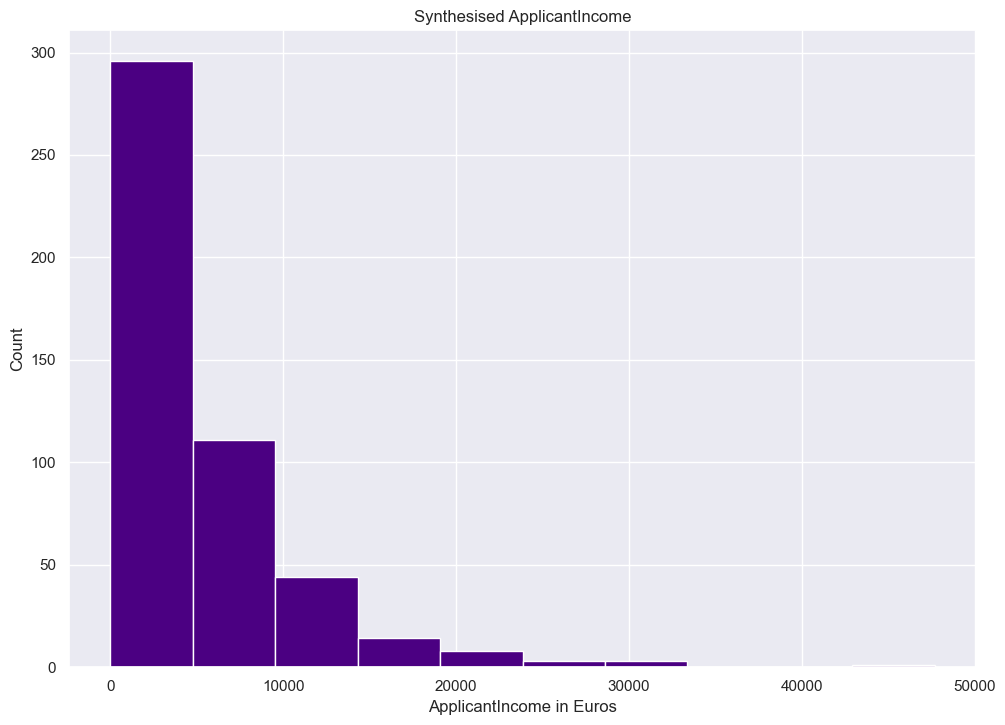

In [125]:
plt.hist(applicantIncome, bins = 10, color = "indigo")
plt.title("Synthesised ApplicantIncome")
plt.xlabel("ApplicantIncome in Euros")
plt.ylabel("Count")
plt.show()

Here we see the syntehesised data which is similar to the real data. 

## Sythensise CoApplicant Income

In [126]:
# We get the mean and standard deviation values for Applicant Income from earlier on where we used teh describe() method 
# We calculate the scale and shape values for the Gamma distribution.
mean = 1581.09  
std = 2617.69


scale = (std**2)/mean
shape = (mean/std)**2
print(scale)
print(shape)

4333.909477702092
0.36481841813602417


In [127]:
# Use the Gamma distribution to generate Random Applicant Incomes.
# Since they will be float values I have used astype(int) to convert to integer values
# I have rouned upto 100 as there were some values under 100 which wasn't realistic. 
# As a result all Co-applicant incomes are rounded upto the nearest 100


shape, scale = 0.3648, 4333.91 
coApplicant = np.random.default_rng().gamma(shape, scale, 480).astype(int)
CoapplicantIncomeRandom = np.round(coApplicant,decimals = -2)

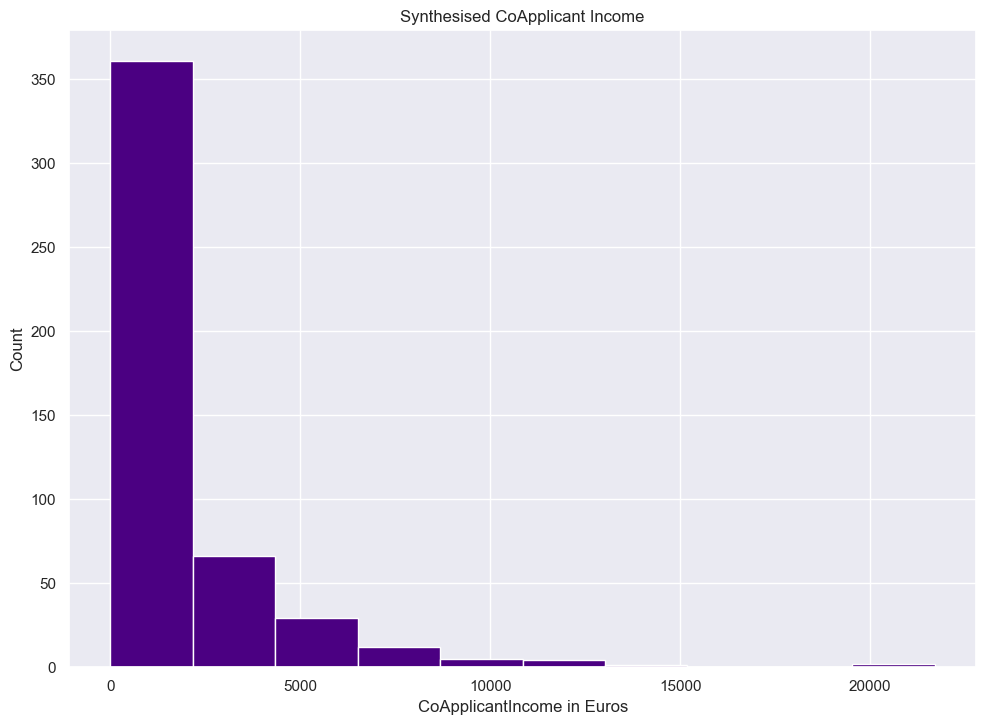

In [128]:
plt.hist(CoapplicantIncomeRandom, bins = 10, color = "indigo")
plt.title("Synthesised CoApplicant Income")
plt.xlabel("CoApplicantIncome in Euros")
plt.ylabel("Count")
plt.show()

### Simulation of Categorical Variables

In [129]:
# Create an empty dataframe loan_bank with column headings.
loan_bank = pd.DataFrame(columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Credit_History', 'Loan_Status'])
# property categories
property = ['rural', 'urban', 'semiurban']
#dependent categories
dependents = [0, 1, 2, 3]

# Terms of Loans
term = [36, 60, 84, 120, 180, 240, 300, 360, 480]

# A for loop to create 480 data points of synthesised data
# we will use the method random.choices() and use weights to syntesise the data.
#
for x in range(480):
    # Synethesis the Loan_Status data using weiths, 0.70 of Applicants get loans
    loanStatus = random.choices("YN", cum_weights=(0.70,1.00), k=1)
    # If loan Status is equal to 'Yes' then we apply the following weights for the categorical data.
    # These weights are weights for each of the categorical data when the applicants are successful
    if loanStatus[0] == 'Y':
        credit = random.choices("YN", cum_weights=(0.9789,1.00),k=1)
        gender_value = random.choices("MF", cum_weights=(0.83,1.00), k=1)
        marry = random.choices("YN", cum_weights=(0.70,1.00), k=1)
        area = random.choices(property, weights=(26, 29, 45), k=1)
        dependent = random.choices(dependents, weights=(56, 16, 19, 9), k=1)
        education = random.choices("YN", cum_weights=(0.81,1.00), k=1)
        employment = random.choices("YN", cum_weights=(0.13,1.00), k=1)
        termOfLoan = random.choices(term, weights=(1, 1, 1, 1, 7, 1, 1, 86, 1), k=1)
        
    # else the applicants are not successful and we apply these weights for each caetgorical variable           
    else:
        credit = random.choices("YN", cum_weights=(0.57,1.00),k=1)
        gender_value = random.choices("MF", cum_weights=(0.78,1.00), k=1)
        marry = random.choices("YN", cum_weights=(0.57,1.00), k=1)
        education = random.choices("YN", cum_weights=(0.75,1.00), k=1)
        dependent = random.choices(dependents, weights=(58, 19, 14, 9), k=1)
        area = random.choices(property, weights=(36, 35, 29), k=1)
        employment = random.choices("YN", cum_weights=(0.16,1.00), k=1)
        termOfLoan = random.choices(term, weights=(1, 1, 1, 1, 7, 1, 2, 80, 6), k=1)

    new_row = {'Gender':gender_value[0],'Married':marry[0],'Dependents':dependent[0],'Education':education[0],'Self_Employed':employment[0],'Property_Area':area[0],'Credit_History':credit[0], 'Loan_Amount_Term':termOfLoan[0],'Loan_Status':loanStatus[0]}
    loan_bank = loan_bank.append(new_row, ignore_index=True)
    x = x + 1




C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank = loan_bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank = loan_bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank = loan_bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank

C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank = loan_bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank = loan_bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank = loan_bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank

C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank = loan_bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank = loan_bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank = loan_bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank

C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank = loan_bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank = loan_bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank = loan_bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank

C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank = loan_bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank = loan_bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank = loan_bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank

C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank = loan_bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank = loan_bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank = loan_bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank

C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank = loan_bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank = loan_bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank = loan_bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank

C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank = loan_bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank = loan_bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank = loan_bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank

C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank = loan_bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank = loan_bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank = loan_bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank

C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank = loan_bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank = loan_bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank = loan_bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank

C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank = loan_bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank = loan_bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank = loan_bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank

C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank = loan_bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank = loan_bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank = loan_bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_15052\2460900026.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loan_bank

We add the colunms of synthesised data for ApplicantIncome and CApplicant Income to the dataframe loan_bank which is for synethsised data. 

In [130]:
loan_bank['ApplicantIncome'] = applicantIncome
loan_bank['CoApplicantIncome'] = CoapplicantIncomeRandom

In [131]:
loan_bank.describe()

,Loan_Amount_Term,ApplicantIncome,CoApplicantIncome
count,480.000000,480.000000,480.000000
mean,333.925000,5086.072917,1620.000000
std,79.008856,5574.735774,2603.589942
min,36.000000,10.000000,0.000000
25%,360.000000,1232.500000,100.000000
50%,360.000000,3572.000000,600.000000
75%,360.000000,6847.000000,2100.000000
max,480.000000,47693.000000,21700.000000


In [132]:
loan_bank.head(10)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Credit_History,Loan_Status,Loan_Amount_Term,ApplicantIncome,CoApplicantIncome
0,M,Y,1,N,N,urban,Y,Y,300.0,4632,1000
1,F,N,0,Y,N,rural,Y,N,360.0,1985,800
2,M,Y,0,N,Y,rural,Y,N,360.0,2123,200
3,M,Y,3,Y,N,urban,Y,Y,360.0,17,4300
4,M,Y,2,Y,Y,semiurban,Y,Y,360.0,2741,2400
5,M,Y,0,Y,N,urban,Y,N,360.0,28585,300
6,M,Y,2,Y,N,rural,Y,Y,60.0,576,0
7,M,N,1,Y,N,rural,Y,Y,360.0,8208,500
8,M,Y,1,Y,N,urban,Y,Y,60.0,6021,0
9,M,Y,0,Y,N,semiurban,Y,Y,360.0,2687,0


Last variable to synthesis is LoanAmount and we use the normal distribution.
Note I have put 'import random' here as it was causing issues

In [133]:
from numpy import random
random.seed(60)
loans = random.normal(loc=150, scale=77, size=480).astype(int)
#applicantLoans = np.round(loans,decimals = -2).astype(int)
loans
loan_bank['LoanAmount'] = loans

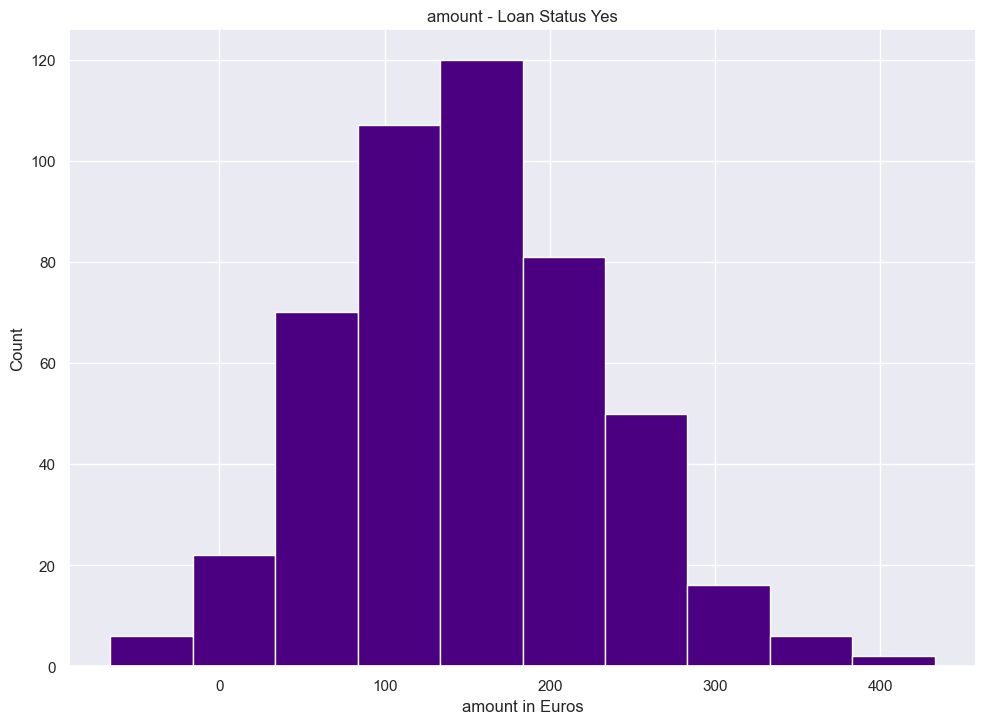

In [134]:
plt.hist(loans, bins = 10, color = "indigo")
plt.title("amount - Loan Status Yes")
plt.xlabel("amount in Euros")
plt.ylabel("Count")
plt.show()

In [135]:
loan_bank['CoApplicantIncome'] = CoapplicantIncomeRandom

In [136]:
loan_bank.head(10)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Credit_History,Loan_Status,Loan_Amount_Term,ApplicantIncome,CoApplicantIncome,LoanAmount
0,M,Y,1,N,N,urban,Y,Y,300.0,4632,1000,79
1,F,N,0,Y,N,rural,Y,N,360.0,1985,800,104
2,M,Y,0,N,Y,rural,Y,N,360.0,2123,200,239
3,M,Y,3,Y,N,urban,Y,Y,360.0,17,4300,54
4,M,Y,2,Y,Y,semiurban,Y,Y,360.0,2741,2400,-2
5,M,Y,0,Y,N,urban,Y,N,360.0,28585,300,250
6,M,Y,2,Y,N,rural,Y,Y,60.0,576,0,206
7,M,N,1,Y,N,rural,Y,Y,360.0,8208,500,179
8,M,Y,1,Y,N,urban,Y,Y,60.0,6021,0,150
9,M,Y,0,Y,N,semiurban,Y,Y,360.0,2687,0,64


In [137]:
print(loan_bank.shape)
print(loan_bank["Loan_Status"].value_counts())
print(loan_bank["Credit_History"].value_counts())

(480, 12)
Y    338
N    142
Name: Loan_Status, dtype: int64
Y    411
N     69
Name: Credit_History, dtype: int64


In [138]:
print(loan_bank["Loan_Amount_Term"].value_counts())

360.0    398
180.0     34
300.0     11
480.0     11
36.0       9
84.0       5
120.0      5
60.0       4
240.0      3
Name: Loan_Amount_Term, dtype: int64


In [139]:
crosstab = pd.crosstab(loan_bank.Credit_History, loan_bank.Loan_Status)

In [140]:
crosstab

Loan_Status,N,Y
Credit_History,,
N,54,15
Y,88,323


In [141]:
ChiSqResult = chi2_contingency(crosstab)

In [142]:
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 4.04511674450133e-21


In the synthesised data the P-value shows that Credit_History has a significant relationship with Loan_Status. 

In [144]:
loan_bank.to_csv('home_loan_synthesised.csv', index=False)


## Conclusion

I mostly used the random library to synthsesis the Loan eligibility dataset. There is alot of research and investigation required to find significant relationships between variables and generate data.

## References

- https://towardsdatascience.com/5-ways-to-use-a-seaborn-heatmap-python-tutorial-c79950f5add3


- https://medium.com/@pinnzonandres/loan-prediction-with-python-d32cf65b5443


- https://www.kaggle.com/datasets/vikasukani/loan-eligible-dataset


- https://www.w3schools.com/python/ref_random_seed.asp


- https://sparkbyexamples.com/numpy/python-numpy-round-array-function/


- https://analyticsindiamag.com/a-beginners-guide-to-chi-square-test-in-python-from-scratch/


- https://www.listendata.com/2019/06/pandas-drop-columns-from-dataframe.html


- https://statisticsbyjim.com/regression/independent-dependent-variables/


- https://www.geeksforgeeks.org/how-to-get-weighted-random-choice-in-python/


- https://www.statology.org/contingency-table-python/





# END
***